In [1]:
from TicTacToe import TicTacToe
from Players import RandomPlayer, RandomWinner, RandomWinnerBlocker, Player
from Learners import ReinforcementTicTacToeLearner

from functools import lru_cache
import matplotlib.pyplot as plt

import numpy as np
import random

### Example of a game between two random players

In [2]:
p1 = RandomPlayer('O')
p2 = RandomPlayer('X')

game = TicTacToe()
p1_next=True

while True:
    if p1_next:
        p1.move(game)
    else:
        p2.move(game)
        
    p1_next = not p1_next
    game.print_board()
    
    if game.game_over():
        game.print_board()

        print('game over')
        break
    if game.winner():
        game.print_board()

        print(f"Winner: {game.winner()}")
        break
    



| O |
|   |
|   |


| O |
|   |
|X  |


| OO|
|   |
|X  |


| OO|
| X |
|X  |


| OO|
| XO|
|X  |


| OO|
|XXO|
|X  |


| OO|
|XXO|
|XO |


| OO|
|XXO|
|XOX|


|OOO|
|XXO|
|XOX|


|OOO|
|XXO|
|XOX|


game over


In [3]:
def plot_wld(first_wld, second_wld):

    def subplot(wld_arr, ax):

        ws = np.cumsum([1 if x == 'w' else 0 for x in wld_arr])
        ds = np.cumsum([1 if x == 'l' else 0 for x in wld_arr])
        ls = np.cumsum([1 if x == 'd' else 0 for x in wld_arr])

        ax.plot(ws, label='w')
        ax.plot(ds, label='d')
        ax.plot(ls, label='l')

        return ax
    fig, axs = plt.subplots(1, 2, sharey=True)

    axs[0] = subplot(first_wld, axs[0])
    axs[1] = subplot(second_wld, axs[1])

    axs[0].set_title('Played First')
    axs[1].set_title('Played Second')

    axs[0].set_xlabel('Games')
    plt.legend()

    return fig, axs


### Train against 3 different players and plot WLD 

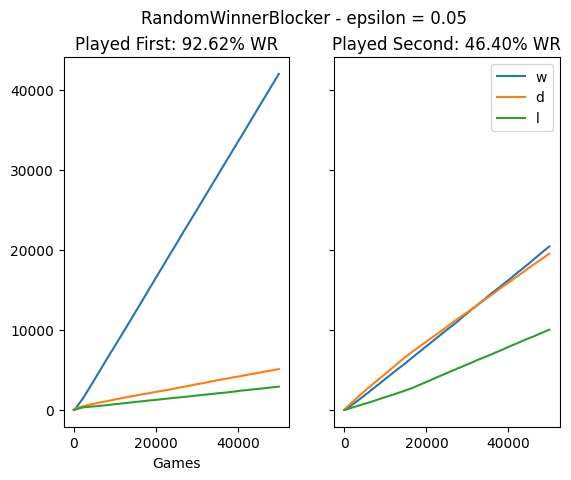

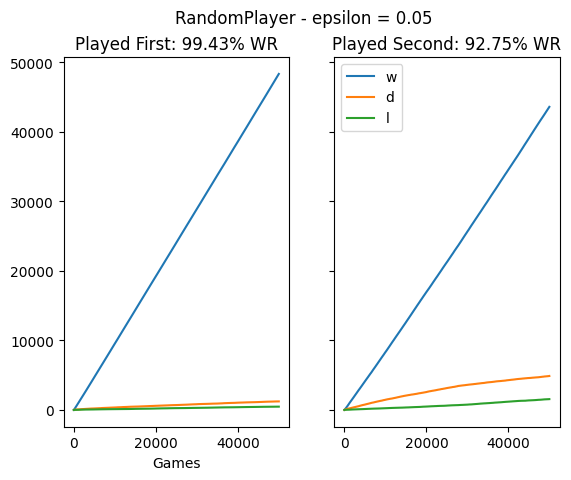

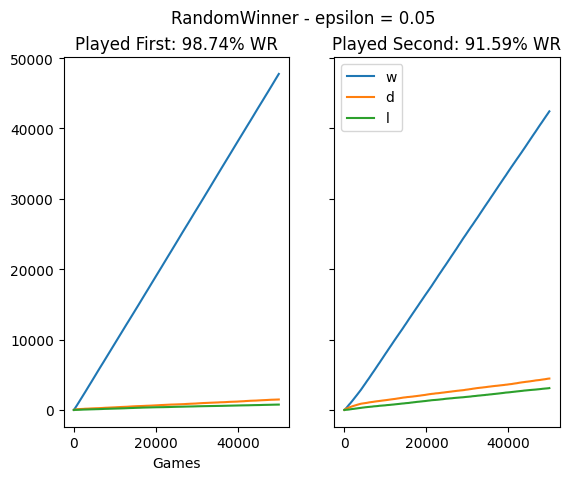

In [6]:
games_num = 50_000
states = [None]*3

for idx, opponent in enumerate([RandomWinnerBlocker, RandomPlayer, RandomWinner]):
    first_rlearner = ReinforcementTicTacToeLearner(
        games_num, 0.05, opponent(player='O'), player='X', play_first=True)
    first_learn_wld = first_rlearner.learn()
    first_play_wld = first_rlearner.play_n_games(games_num)
    first_win_pct = 100*first_play_wld.count('w')/len(first_play_wld)

    second_rlearner = ReinforcementTicTacToeLearner(
        games_num, 0.05, opponent(player='O'), player='X', play_first=False)
    second_learn_wld = second_rlearner.learn()
    second_play_wld = second_rlearner.play_n_games(games_num)
    second_win_pct = 100*second_play_wld.count('w')/len(first_play_wld)


    states[idx] = [first_rlearner.state_dict, second_rlearner.state_dict]

    fig, axs = plot_wld(first_learn_wld, second_learn_wld)
    axs[0].set_title(f"{axs[0].get_title()}: {first_win_pct:.2f}% WR")
    axs[1].set_title(f"{axs[1].get_title()}: {second_win_pct:.2f}% WR")

    fig.suptitle(
        f"{type(first_rlearner.oppoent).__name__} - epsilon = {first_rlearner.epsilon}")
    plt.show()
